<a href="https://colab.research.google.com/github/garfield-gray/DataMining/blob/main/Data_Exploration_%26_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


#Theoretical

##2

###1

In [5]:
A = np.array([55, 72, 60, 54, 42, 64, 43, 89, 96, 38, 79, 52, 56, 92, 7, 8, 24, 39, 44, 68, 68, 52, 4, 16, 73, 46, 96, 38, 20, 27])
B = np.array([11, 16, 13, 11, 9, 14, 9, 19, 20, 8, 17, 11, 12, 20, 2, 3, 5, 8, 9, 14, 14, 11, 2, 4, 15, 9, 21, 8, 4, 5])

In [6]:
np.median(A)
np.median(B)
print('mean value of A', np.mean(A))
print('mean value of B', np.mean(B))
print('median value of A', np.median(A))
print('median value of B', np.median(B))
print('quantiles of A are: (Q1, Q2, Q3)', np.quantile(A, [0.25, 0.5, 0.75]))
print('quantiles of B are: (Q1, Q2, Q3)', np.quantile(B, [0.25, 0.5, 0.75]))
print('standard deviation of A', np.std(A))
print('standard deviation of B', np.std(B))

mean value of A 50.733333333333334
mean value of B 10.8
median value of A 52.0
median value of B 11.0
quantiles of A are: (Q1, Q2, Q3) [38. 52. 68.]
quantiles of B are: (Q1, Q2, Q3) [ 8. 11. 14.]
standard deviation of A 25.786215094288053
standard deviation of B 5.393823628311676


###2

In [7]:
print('A: min, (Q1, Q2, Q3), max',np.min(A), np.quantile(A, [0.25, 0.5, 0.75]),np.max(A))
print('B: min, (Q1, Q2, Q3), max',np.min(B), np.quantile(B, [0.25, 0.5, 0.75]),np.max(B))

A: min, (Q1, Q2, Q3), max 4 [38. 52. 68.] 96
B: min, (Q1, Q2, Q3), max 2 [ 8. 11. 14.] 21


In [8]:
print('B most',np.quantile(B, [0.25, 0.5, 0.75])[2]+1.5*(np.quantile(B, [0.25, 0.5, 0.75])[2]-np.quantile(B, [0.25, 0.5, 0.75])[0]))
print('B least',1.5*(np.quantile(B, [0.25, 0.5, 0.75])[2]-np.quantile(B, [0.25, 0.5, 0.75])[0])-np.quantile(B, [0.25, 0.5, 0.75])[0])
print('A most',np.quantile(A, [0.25, 0.5, 0.75])[2]+1.5*(np.quantile(A, [0.25, 0.5, 0.75])[2]-np.quantile(A, [0.25, 0.5, 0.75])[0]))
print('A least',1.5*(np.quantile(A, [0.25, 0.5, 0.75])[2]-np.quantile(A, [0.25, 0.5, 0.75])[0])-np.quantile(A, [0.25, 0.5, 0.75])[0])

B most 23.0
B least 1.0
A most 113.0
A least 7.0


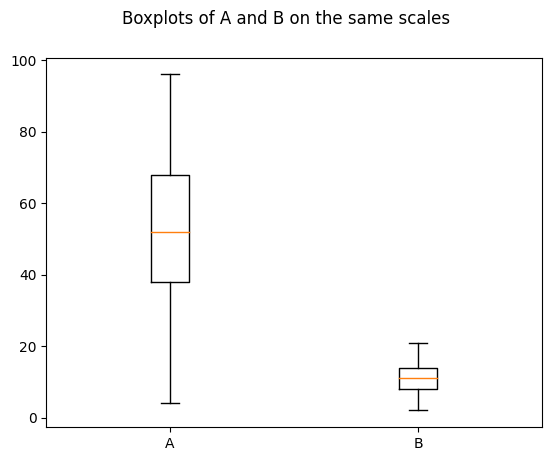

In [9]:
my_dict = {'A': A, 'B': B}

fig, ax = plt.subplots()
fig.suptitle('Boxplots of A and B on the same scales')
ax.boxplot(my_dict.values())
ax.set_xticklabels(my_dict.keys())
plt.show()

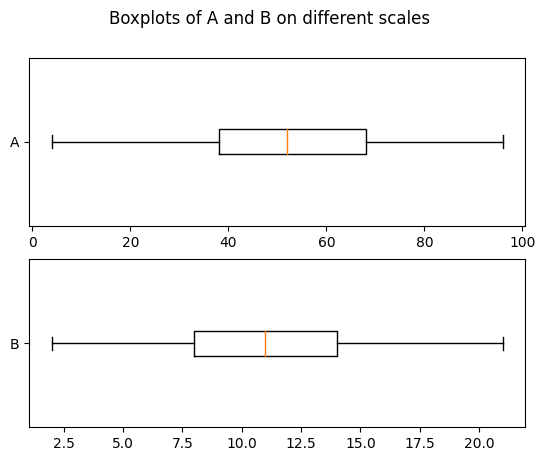

In [10]:
fig, axs = plt.subplots(2)
fig.suptitle('Boxplots of A and B on different scales')
axs[0].boxplot(A, vert=False, labels="A")
axs[1].boxplot(B, vert=False, labels="B")
plt.show()

###3

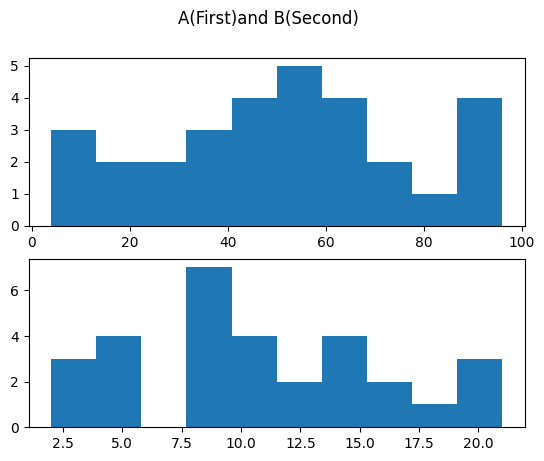

In [11]:
fig, axs = plt.subplots(2)
fig.suptitle('A(First)and B(Second)')
axs[0].hist(A)
axs[1].hist(B)
plt.show()

###4

In [12]:
from scipy import stats
SA = stats.zscore(A)
SB = stats.zscore(B)

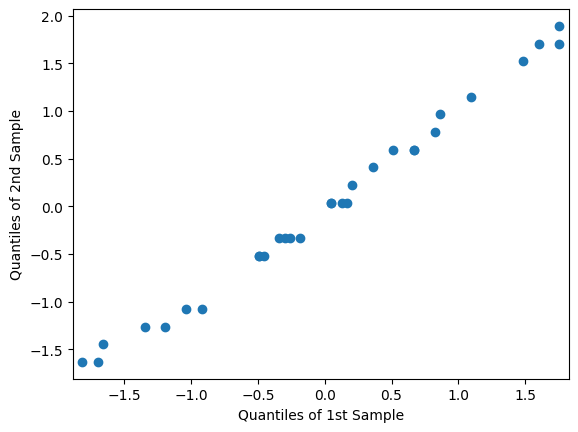

In [13]:
import statsmodels.api as sm
from statsmodels.graphics.gofplots import qqplot_2samples
pp_x = SA
pp_y = SB
qqplot_2samples(pp_x, pp_y)
plt.show()


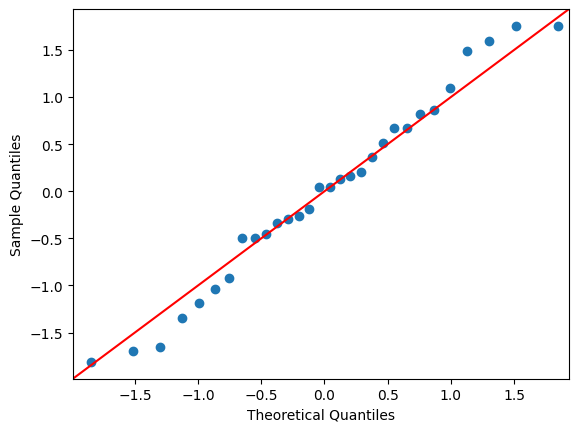

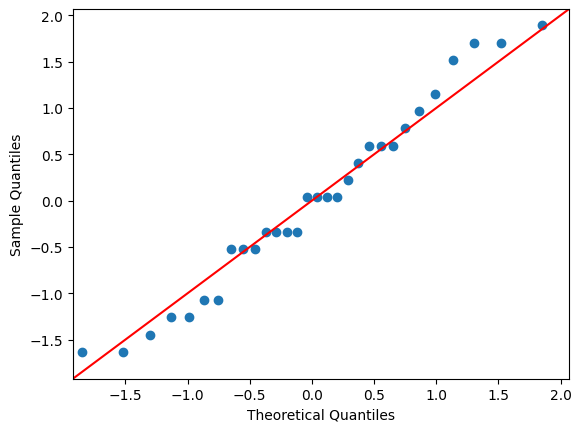

In [14]:

import statsmodels.api as sm
import pylab as py

sm.qqplot(SA, line ='45')
sm.qqplot(SB, line ='45')
py.show()

###5

In [15]:
np.corrcoef(SA, SB)

array([[1.        , 0.99564086],
       [0.99564086, 1.        ]])

#Imperical

##Preprocessing

###1

####Reading the Data

In [16]:
%cd /content/drive/MyDrive/Uni/Data/DataMining/Winter2024/CA#1/weatherAUS
!ls

/content/drive/MyDrive/Uni/Data/DataMining/Winter2024/CA#1/weatherAUS
Adelaide.csv	   Cobar.csv		 Mildura.csv	    Penrith.csv        Tuggeranong.csv
Albany.csv	   CoffsHarbour.csv	 Moree.csv	    PerthAirport.csv   Uluru.csv
Albury.csv	   Dartmoor.csv		 MountGambier.csv   Perth.csv	       WaggaWagga.csv
AliceSprings.csv   Darwin.csv		 MountGinini.csv    Portland.csv       Walpole.csv
BadgerysCreek.csv  GoldCoast.csv	 Newcastle.csv	    Richmond.csv       Watsonia.csv
Ballarat.csv	   Hobart.csv		 Nhil.csv	    Sale.csv	       Williamtown.csv
Bendigo.csv	   Katherine.csv	 NorahHead.csv	    SalmonGums.csv     Witchcliffe.csv
Brisbane.csv	   Launceston.csv	 NorfolkIsland.csv  SydneyAirport.csv  Wollongong.csv
Cairns.csv	   MelbourneAirport.csv  Nuriootpa.csv	    Sydney.csv	       Woomera.csv
Canberra.csv	   Melbourne.csv	 PearceRAAF.csv     Townsville.csv


In [17]:
#import modules
import os
import glob
import pandas as pd
#list all csv files only
csvFiles = glob.glob('*.{}'.format('csv'))
len(csvFiles)

49

In [18]:
listOfDataFrames = []

for fileName in csvFiles:
    df = pd.read_csv(fileName, index_col=None, header=0)
    listOfDataFrames.append(df)

In [19]:
frame = pd.concat(listOfDataFrames, axis=0, ignore_index=True)
len(frame.columns)

160

In [20]:
liss = []
for i in range(49):
  liss.append(len((listOfDataFrames[i]).columns))
from collections import Counter

Counter(liss)

Counter({23: 26, 21: 7, 19: 7, 17: 4, 22: 5})

In [21]:
sum(liss)

1056

####Refining

In [22]:
from  difflib import get_close_matches

In [23]:
columnNames = [
  'Date',
  'Location',
  'MinTempC',
  'MaxTempC',
  'MinTempF',
  'MaxTempF',
  'Rainfall',
  'Evaporation',
  'Sunshine',
  'WindGustDir',
  'WindGustSpeed',
  'WindDir9am',
  'WindDir3pm',
  'WindSpeed9am',
  'WindSpeed3pm',
  'Humidity9am',
  'Humidity3pm',
  'Pressure9am',
  'Pressure3pm',
  'Cloud9am',
  'Cloud3pm',
  'Temp9amC',
  'Temp3pmC',
  'Temp9amF',
  'Temp3pmF',
  'RainToday',
  'RainTomorrow',
 ]

len(columnNames)

27

In [24]:
columnConvertDict = {}
notDitectedIndecies = []
j = 0
for i in frame.columns:
  if len(get_close_matches(i, columnNames)) != 0:
    print(j, i,"->" ,get_close_matches(i, columnNames)[0])
    columnConvertDict[i] = get_close_matches(i, columnNames)[0]
  else:
    print(j, i)
    notDitectedIndecies.append(j)
  j +=1

0 Pressure_3_pm -> Pressure3pm
1 Min_Temp_F -> MinTempF
2 Max_Temp_F -> MaxTempF
3 Rain_Tomorrow -> RainTomorrow
4 Wind_Dir_3_pm -> WindDir3pm
5 Temp_3_pm_F -> Temp3pmF
6 Location -> Location
7 Wind_Gust_Dir -> WindGustDir
8 Wind_Speed_9_am -> WindSpeed9am
9 Humidity_9_am -> Humidity9am
10 Wind_Gust_Speed -> WindGustSpeed
11 Date -> Date
12 Wind_Dir_9_am -> WindDir9am
13 Temp_9_am_F -> Temp9amF
14 Wind_Speed_3_pm -> WindSpeed3pm
15 Cloud_9_am -> Cloud9am
16 Humidity_3_pm -> Humidity3pm
17 Cloud_3_pm -> Cloud3pm
18 Sunshine -> Sunshine
19 Pressure_9_am -> Pressure9am
20 Rain_Today -> RainToday
21 Rainfall -> Rainfall
22 Evaporation -> Evaporation
23 pressure.3.pm -> Pressure3pm
24 wind.gust.speed -> WindGustSpeed
25 max.temp.f
26 humidity.3.pm -> Humidity3pm
27 humidity.9.am -> Humidity9am
28 rainfall -> Rainfall
29 temp.9.am.f -> Temp9amF
30 date -> Date
31 pressure.9.am -> Pressure9am
32 temp.3.pm.f -> Temp3pmF
33 min.temp.f
34 wind.speed.3.pm -> WindSpeed3pm
35 wind.dir.9.am -> WindD

In [25]:
frame.columns[notDitectedIndecies]

Index(['max.temp.f', 'min.temp.f', 'min_temp_c', 'max_temp_c', 'max_temp_f',
       'min_temp_f', 'max temp f', 'min temp f', 'min temp c', 'max temp c',
       'min.temp.c', 'max.temp.c'],
      dtype='object')

In [26]:
columnConvertDict['max.temp.f'] = 'MaxTempF'
columnConvertDict['min.temp.f'] = 'MinTempF'
columnConvertDict['max_temp_f'] = 'MaxTempF'
columnConvertDict['min_temp_f'] = 'MinTempF'
columnConvertDict['max temp f'] = 'MaxTempF'
columnConvertDict['min temp f'] = 'MinTempF'
columnConvertDict['max.temp.c'] = 'MaxTempC'
columnConvertDict['min.temp.c'] = 'MinTempC'
columnConvertDict['max_temp_c'] = 'MaxTempC'
columnConvertDict['min_temp_c'] = 'MinTempC'
columnConvertDict['max temp c'] = 'MaxTempC'
columnConvertDict['min temp c'] = 'MinTempC'
columnConvertDict['temp.3.pm.c'] = 'Temp3pmC'
columnConvertDict['temp.9.am.c'] = 'Temp9amC'
columnConvertDict['temp 3 pm c'] = 'Temp3pmC'
columnConvertDict['temp 9 am c'] = 'Temp9amC'

In [27]:
columnConvertDict

{'Pressure_3_pm': 'Pressure3pm',
 'Min_Temp_F': 'MinTempF',
 'Max_Temp_F': 'MaxTempF',
 'Rain_Tomorrow': 'RainTomorrow',
 'Wind_Dir_3_pm': 'WindDir3pm',
 'Temp_3_pm_F': 'Temp3pmF',
 'Location': 'Location',
 'Wind_Gust_Dir': 'WindGustDir',
 'Wind_Speed_9_am': 'WindSpeed9am',
 'Humidity_9_am': 'Humidity9am',
 'Wind_Gust_Speed': 'WindGustSpeed',
 'Date': 'Date',
 'Wind_Dir_9_am': 'WindDir9am',
 'Temp_9_am_F': 'Temp9amF',
 'Wind_Speed_3_pm': 'WindSpeed3pm',
 'Cloud_9_am': 'Cloud9am',
 'Humidity_3_pm': 'Humidity3pm',
 'Cloud_3_pm': 'Cloud3pm',
 'Sunshine': 'Sunshine',
 'Pressure_9_am': 'Pressure9am',
 'Rain_Today': 'RainToday',
 'Rainfall': 'Rainfall',
 'Evaporation': 'Evaporation',
 'pressure.3.pm': 'Pressure3pm',
 'wind.gust.speed': 'WindGustSpeed',
 'humidity.3.pm': 'Humidity3pm',
 'humidity.9.am': 'Humidity9am',
 'rainfall': 'Rainfall',
 'temp.9.am.f': 'Temp9amF',
 'date': 'Date',
 'pressure.9.am': 'Pressure9am',
 'temp.3.pm.f': 'Temp3pmF',
 'wind.speed.3.pm': 'WindSpeed3pm',
 'wind.dir

In [28]:
len(columnConvertDict)

160

In [29]:
for i in range(49):
  listOfDataFrames[i] = listOfDataFrames[i].rename(columns=columnConvertDict)

In [30]:
newframe = pd.concat(listOfDataFrames, axis=0, ignore_index=True)
len(newframe.columns)

27

In [31]:
newframe

,Pressure3pm,MinTempF,MaxTempF,RainTomorrow,WindDir3pm,Temp3pmF,Location,WindGustDir,WindSpeed9am,Humidity9am,...,Cloud3pm,Sunshine,Pressure9am,RainToday,Rainfall,Evaporation,MaxTempC,Temp9amC,MinTempC,Temp3pmC
0,1004.4,64.22,95.36,No,SW,92.12,Cobar,SSW,6.0,20.0,...,5.0,12.3,1006.3,No,0.0,12.0,NaN,NaN,NaN,NaN
1,1012.1,65.12,84.02,No,SSE,80.60,Cobar,S,19.0,30.0,...,1.0,13.0,1012.9,No,0.0,14.8,NaN,NaN,NaN,NaN
2,1011.6,59.90,93.38,No,N,90.86,Cobar,SE,NaN,NaN,...,1.0,13.3,NaN,No,0.0,12.6,NaN,NaN,NaN,NaN
3,1009.2,66.92,99.68,No,NNW,94.82,Cobar,NNE,30.0,42.0,...,6.0,10.6,1012.3,No,0.0,10.8,NaN,NaN,NaN,NaN
4,1009.1,71.42,101.12,No,WSW,96.08,Cobar,WNW,6.0,37.0,...,5.0,12.2,1012.7,No,0.0,11.4,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,1013.8,NaN,NaN,Yes,NNW,NaN,Perth,NW,9.0,89.0,...,6.0,7.5,1017.1,No,0.2,1.8,19.9,13.0,10.3,18.5
145456,1008.9,NaN,NaN,No,SW,NaN,Perth,SSW,17.0,90.0,...,7.0,0.0,1005.6,Yes,61.2,3.6,16.8,16.4,13.0,15.6
145457,1019.4,NaN,NaN,No,ESE,NaN,Perth,SE,11.0,85.0,...,6.0,6.5,1019.2,No,0.4,1.8,18.9,15.1,13.3,18.0
145458,1023.4,NaN,NaN,No,ESE,NaN,Perth,SE,9.0,62.0,...,3.0,9.3,1025.9,No,0.0,3.8,18.2,14.0,11.5,17.6


###2

In [32]:
newframe.head(5)

,Pressure3pm,MinTempF,MaxTempF,RainTomorrow,WindDir3pm,Temp3pmF,Location,WindGustDir,WindSpeed9am,Humidity9am,...,Cloud3pm,Sunshine,Pressure9am,RainToday,Rainfall,Evaporation,MaxTempC,Temp9amC,MinTempC,Temp3pmC
0,1004.4,64.22,95.36,No,SW,92.12,Cobar,SSW,6.0,20.0,...,5.0,12.3,1006.3,No,0.0,12.0,NaN,NaN,NaN,NaN
1,1012.1,65.12,84.02,No,SSE,80.60,Cobar,S,19.0,30.0,...,1.0,13.0,1012.9,No,0.0,14.8,NaN,NaN,NaN,NaN
2,1011.6,59.90,93.38,No,N,90.86,Cobar,SE,NaN,NaN,...,1.0,13.3,NaN,No,0.0,12.6,NaN,NaN,NaN,NaN
3,1009.2,66.92,99.68,No,NNW,94.82,Cobar,NNE,30.0,42.0,...,6.0,10.6,1012.3,No,0.0,10.8,NaN,NaN,NaN,NaN
4,1009.1,71.42,101.12,No,WSW,96.08,Cobar,WNW,6.0,37.0,...,5.0,12.2,1012.7,No,0.0,11.4,NaN,NaN,NaN,NaN


###3

In [33]:
dict(newframe.dtypes)

{'Pressure3pm': dtype('float64'),
 'MinTempF': dtype('float64'),
 'MaxTempF': dtype('float64'),
 'RainTomorrow': dtype('O'),
 'WindDir3pm': dtype('O'),
 'Temp3pmF': dtype('float64'),
 'Location': dtype('O'),
 'WindGustDir': dtype('O'),
 'WindSpeed9am': dtype('float64'),
 'Humidity9am': dtype('float64'),
 'WindGustSpeed': dtype('float64'),
 'Date': dtype('O'),
 'WindDir9am': dtype('O'),
 'Temp9amF': dtype('float64'),
 'WindSpeed3pm': dtype('float64'),
 'Cloud9am': dtype('float64'),
 'Humidity3pm': dtype('float64'),
 'Cloud3pm': dtype('float64'),
 'Sunshine': dtype('float64'),
 'Pressure9am': dtype('float64'),
 'RainToday': dtype('O'),
 'Rainfall': dtype('float64'),
 'Evaporation': dtype('float64'),
 'MaxTempC': dtype('float64'),
 'Temp9amC': dtype('float64'),
 'MinTempC': dtype('float64'),
 'Temp3pmC': dtype('float64')}

###4

In [34]:
newframe.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 27 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Pressure3pm    130432 non-null  float64
 1   MinTempF       85747 non-null   float64
 2   MaxTempF       85933 non-null   float64
 3   RainTomorrow   142193 non-null  object 
 4   WindDir3pm     141232 non-null  object 
 5   Temp3pmF       87272 non-null   float64
 6   Location       145460 non-null  object 
 7   WindGustDir    135134 non-null  object 
 8   WindSpeed9am   143693 non-null  float64
 9   Humidity9am    142806 non-null  float64
 10  WindGustSpeed  135197 non-null  float64
 11  Date           145460 non-null  object 
 12  WindDir9am     134894 non-null  object 
 13  Temp9amF       88478 non-null   float64
 14  WindSpeed3pm   142398 non-null  float64
 15  Cloud9am       89572 non-null   float64
 16  Humidity3pm    140953 non-null  float64
 17  Cloud3pm       86102 non-null

In [35]:
newframe = newframe.round({
  'Temp9amC':0,
  'Temp3pmC':0,
  'Temp9amF':0,
  'Temp3pmF':0,
  'MinTempC':0,
  'MaxTempC':0,
  'MinTempF':0,
  'MaxTempF':0,})

In [36]:
newframe

,Pressure3pm,MinTempF,MaxTempF,RainTomorrow,WindDir3pm,Temp3pmF,Location,WindGustDir,WindSpeed9am,Humidity9am,...,Cloud3pm,Sunshine,Pressure9am,RainToday,Rainfall,Evaporation,MaxTempC,Temp9amC,MinTempC,Temp3pmC
0,1004.4,64.0,95.0,No,SW,92.0,Cobar,SSW,6.0,20.0,...,5.0,12.3,1006.3,No,0.0,12.0,NaN,NaN,NaN,NaN
1,1012.1,65.0,84.0,No,SSE,81.0,Cobar,S,19.0,30.0,...,1.0,13.0,1012.9,No,0.0,14.8,NaN,NaN,NaN,NaN
2,1011.6,60.0,93.0,No,N,91.0,Cobar,SE,NaN,NaN,...,1.0,13.3,NaN,No,0.0,12.6,NaN,NaN,NaN,NaN
3,1009.2,67.0,100.0,No,NNW,95.0,Cobar,NNE,30.0,42.0,...,6.0,10.6,1012.3,No,0.0,10.8,NaN,NaN,NaN,NaN
4,1009.1,71.0,101.0,No,WSW,96.0,Cobar,WNW,6.0,37.0,...,5.0,12.2,1012.7,No,0.0,11.4,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,1013.8,NaN,NaN,Yes,NNW,NaN,Perth,NW,9.0,89.0,...,6.0,7.5,1017.1,No,0.2,1.8,20.0,13.0,10.0,18.0
145456,1008.9,NaN,NaN,No,SW,NaN,Perth,SSW,17.0,90.0,...,7.0,0.0,1005.6,Yes,61.2,3.6,17.0,16.0,13.0,16.0
145457,1019.4,NaN,NaN,No,ESE,NaN,Perth,SE,11.0,85.0,...,6.0,6.5,1019.2,No,0.4,1.8,19.0,15.0,13.0,18.0
145458,1023.4,NaN,NaN,No,ESE,NaN,Perth,SE,9.0,62.0,...,3.0,9.3,1025.9,No,0.0,3.8,18.0,14.0,12.0,18.0


###5

In [37]:
newframe.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 27 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Pressure3pm    130432 non-null  float64
 1   MinTempF       85747 non-null   float64
 2   MaxTempF       85933 non-null   float64
 3   RainTomorrow   142193 non-null  object 
 4   WindDir3pm     141232 non-null  object 
 5   Temp3pmF       87272 non-null   float64
 6   Location       145460 non-null  object 
 7   WindGustDir    135134 non-null  object 
 8   WindSpeed9am   143693 non-null  float64
 9   Humidity9am    142806 non-null  float64
 10  WindGustSpeed  135197 non-null  float64
 11  Date           145460 non-null  object 
 12  WindDir9am     134894 non-null  object 
 13  Temp9amF       88478 non-null   float64
 14  WindSpeed3pm   142398 non-null  float64
 15  Cloud9am       89572 non-null   float64
 16  Humidity3pm    140953 non-null  float64
 17  Cloud3pm       86102 non-null

In [38]:
newframe.memory_usage(deep=True).sum() / 1024**2

80.85088062286377

###6

####CloudAndWindSpeed

In [39]:
print(pd.unique(newframe['Cloud9am']))
print(pd.unique(newframe['Cloud3pm']))
# these could be saved as np.int8
print(pd.unique(newframe['WindSpeed9am']))
print(pd.unique(newframe['WindSpeed3pm']))
print(pd.unique(newframe['WindGustSpeed']))
# these could be saved as np.int16

[ 2.  1. nan  8.  3.  0.  4.  7.  5.  6.  9.]
[ 5.  1.  6.  8.  2.  3.  0.  7.  4. nan  9.]
[  6.  19.  nan  30.  17.   7.  15.  11.  24.  13.  22.  26.   9.  20.
  35.  28.   2.   4.  31.   0.  33.  37.  41.  39.  44.  43.  46.  56.
  48.  54.  50.  65.  52.  61.  57.  63.  67.  59.  87.  72.  69.  83.
  74. 130.]
[20. 19.  7. 15.  6. 13.  9. 17. 11. 22. 28. 24. 35.  4.  2. 26.  0. 30.
 37. 31. 43. nan 41. 33. 39. 48. 46. 50. 44. 54. 61. 56. 57. 52. 59. 76.
 65. 72. 63. 74. 87. 83. 78. 69. 67.]
[ 48.  37.  30.  46.  31.  35.  43.  41.  39.  44.  33.  61.  59.  56.
  94.  50.  28.  52.  57.  54.  63.  26.  24.  65.  nan  20.  19.  17.
  22.  15.  83.  74.  72.  76.  69.  67.  85.  13.  78.  81. 100.  87.
  70.  80.  98.  11. 107.   9.  91.  89. 117.  96. 113.   7.  93. 102.
 106. 104. 122. 109. 115. 111. 135. 120. 126. 124.   6. 130.]


In [40]:
# convert_dict = {'Cloud3pm': 'Int8', 'Cloud9am': 'Int8', 'WindSpeed9am': 'Int16', 'WindSpeed3pm': 'Int16', 'WindGustSpeed': 'Int16'}

# newframe = newframe.astype(convert_dict)

In [41]:
newframe.memory_usage(deep=True).sum() / 1024**2

80.85088062286377

####Date

In [42]:
newframe['Date']= pd.to_datetime(newframe['Date'])

In [43]:
newframe['Date']

0        2009-01-01
1        2009-01-02
2        2009-01-03
3        2009-01-04
4        2009-01-05
            ...    
145455   2017-06-21
145456   2017-06-22
145457   2017-06-23
145458   2017-06-24
145459   2017-06-25
Name: Date, Length: 145460, dtype: datetime64[ns]

In [44]:
newframe.memory_usage(deep=True).sum() / 1024**2

72.66631412506104

####Temp

In [45]:
newframe [[
  'Temp9amC',
  'Temp3pmC',
  'Temp9amF',
  'Temp3pmF',
  'MinTempC',
  'MaxTempC',
  'MinTempF',
  'MaxTempF',]].max()

Temp9amC     40.0
Temp3pmC     47.0
Temp9amF    102.0
Temp3pmF    115.0
MinTempC     34.0
MaxTempC     47.0
MinTempF     89.0
MaxTempF    119.0
dtype: float64

In [46]:
# convert_dict = {
#     'Temp9amC':'Int8',
#     'Temp3pmC':'Int8',
#     'Temp9amF':'Int8',
#     'Temp3pmF':'Int8',
#     'MinTempC':'Int8',
#     'MaxTempC':'Int8',
#     'MinTempF':'Int8',
#     'MaxTempF':'Int8',
# }

# newframe = newframe.astype(convert_dict)
# newframe.memory_usage(deep=True).sum() / 1024**2

####RainToday/Tomorrow

In [47]:
newframe['RainToday'] = newframe['RainToday'].map({'Yes': 1, 'No': 0 })
newframe['RainTomorrow'] = newframe['RainTomorrow'].map({'Yes': 1, 'No': 0})
convert_dict = {
    'RainToday':'boolean',
    'RainTomorrow':'boolean',
}

newframe = newframe.astype(convert_dict)
newframe.memory_usage(deep=True).sum() / 1024**2

56.959354400634766

####WindDir

In [48]:
convert_dict = {
    'WindDir9am':'category',
    'WindDir3pm':'category',
    'WindGustDir': 'category'
}

newframe = newframe.astype(convert_dict)
newframe.memory_usage(deep=True).sum() / 1024**2

33.396294593811035

####Humidity

In [49]:
# convert_dict = {'Humidity9am': 'Int8', 'Humidity3pm': 'Int8'}

# newframe = newframe.astype(convert_dict)
newframe.memory_usage(deep=True).sum() / 1024**2

33.396294593811035

###7

In [50]:
#almost a quarter

###8

In [51]:
newframe.isnull().sum()

Pressure3pm      15028
MinTempF         59713
MaxTempF         59527
RainTomorrow      3267
WindDir3pm        4228
Temp3pmF         58188
Location             0
WindGustDir      10326
WindSpeed9am      1767
Humidity9am       2654
WindGustSpeed    10263
Date                 0
WindDir9am       10566
Temp9amF         56982
WindSpeed3pm      3062
Cloud9am         55888
Humidity3pm       4507
Cloud3pm         59358
Sunshine         69835
Pressure9am      15065
RainToday         3261
Rainfall          3261
Evaporation      62790
MaxTempC         87194
Temp9amC         90245
MinTempC         87232
Temp3pmC         90881
dtype: int64

###9-10-11

In [52]:
newframe['Temp9amF'] = (newframe['Temp9amF']-32)*(5/9)
newframe['Temp3pmF'] = (newframe['Temp3pmF']-32)*(5/9)
newframe['MinTempF'] = (newframe['MinTempF']-32)*(5/9)
newframe['MaxTempF'] = (newframe['MaxTempF']-32)*(5/9)

newframe['Temp9am'] = newframe['Temp9amC'].fillna(newframe['Temp9amF'])
newframe['Temp3pm'] = newframe['Temp3pmC'].fillna(newframe['Temp3pmF'])
newframe['MinTemp'] = newframe['MinTempC'].fillna(newframe['MinTempF'])
newframe['MaxTemp'] = newframe['MaxTempC'].fillna(newframe['MaxTempF'])

newframe = newframe.drop(columns=['Temp9amC',
                                  'Temp3pmC',
                                  'Temp9amF',
                                  'Temp3pmF',
                                  'MinTempC',
                                  'MaxTempC',
                                  'MinTempF',
                                  'MaxTempF' ])

In [53]:
newframe.isnull().sum()

Pressure3pm      15028
RainTomorrow      3267
WindDir3pm        4228
Location             0
WindGustDir      10326
WindSpeed9am      1767
Humidity9am       2654
WindGustSpeed    10263
Date                 0
WindDir9am       10566
WindSpeed3pm      3062
Cloud9am         55888
Humidity3pm       4507
Cloud3pm         59358
Sunshine         69835
Pressure9am      15065
RainToday         3261
Rainfall          3261
Evaporation      62790
Temp9am           1767
Temp3pm           3609
MinTemp           1485
MaxTemp           1261
dtype: int64

In [54]:
df = newframe.drop(columns = ['Cloud9am', 'Cloud3pm'])

df[['RainToday', 'RainTomorrow']] = df[['RainToday', 'RainTomorrow']].fillna(method='pad')

df[['WindDir9am', 'WindDir3pm']] = df[['WindDir9am', 'WindDir3pm']].fillna(method='pad')

df['Pressure9am'].fillna(value=np.nanmean(df['Pressure9am']), inplace=True)
df['Pressure3pm'].fillna(value=np.nanmean(df['Pressure3pm']), inplace=True)

df['Sunshine'].fillna(value=np.nanmean(df['Sunshine']), inplace=True)
df['Evaporation'].fillna(value=np.nanmean(df['Evaporation']), inplace=True)

df['Temp9am'].fillna(value=np.nanmean(df['Temp9am']), inplace=True)
df['Temp3pm'].fillna(value=np.nanmean(df['Temp3pm']), inplace=True)
df['MinTemp'].fillna(value=np.nanmean(df['MinTemp']), inplace=True)
df['MaxTemp'].fillna(value=np.nanmean(df['MaxTemp']), inplace=True)

df['Rainfall'].fillna(value=np.nanmean(df['Rainfall']), inplace=True)

df['WindSpeed9am'].fillna(value=np.nanmedian(df['WindSpeed9am']), inplace=True)
df['WindSpeed3pm'].fillna(value=np.nanmedian(df['WindSpeed3pm']), inplace=True)

df['Humidity9am'].fillna(value=np.nanmedian(df['Humidity9am']), inplace=True)
df['Humidity3pm'].fillna(value=np.nanmedian(df['Humidity3pm']), inplace=True)

df['WindGustSpeed'].fillna(value=np.nanmean(df['WindGustSpeed']), inplace=True)

df['WindGustDir'] = df['WindGustDir'].fillna(method='pad')


In [55]:
df.isnull().sum()

Pressure3pm      0
RainTomorrow     0
WindDir3pm       0
Location         0
WindGustDir      0
WindSpeed9am     0
Humidity9am      0
WindGustSpeed    0
Date             0
WindDir9am       0
WindSpeed3pm     0
Humidity3pm      0
Sunshine         0
Pressure9am      0
RainToday        0
Rainfall         0
Evaporation      0
Temp9am          0
Temp3pm          0
MinTemp          0
MaxTemp          0
dtype: int64

In [56]:
df = df.round({
  'Temp3pm':0,
  'Temp9am':0,
  'MinTemp':0,
  'MaxTemp':0,})
convert_dict = {
    'Temp3pm':'Int8',
    'Temp9am':'Int8',
    'MinTemp':'Int8',
    'MaxTemp':'Int8',
}

df = df.astype(convert_dict)
df.memory_usage(deep=True).sum() / 1024**2

23.40834903717041

In [57]:
df

,Pressure3pm,RainTomorrow,WindDir3pm,Location,WindGustDir,WindSpeed9am,Humidity9am,WindGustSpeed,Date,WindDir9am,...,Humidity3pm,Sunshine,Pressure9am,RainToday,Rainfall,Evaporation,Temp9am,Temp3pm,MinTemp,MaxTemp
0,1004.4,False,SW,Cobar,SSW,6.0,20.0,48.0,2009-01-01,ENE,...,13.0,12.3,1006.30000,False,0.0,12.0,27,33,18,35
1,1012.1,False,SSE,Cobar,S,19.0,30.0,37.0,2009-01-02,SSE,...,8.0,13.0,1012.90000,False,0.0,14.8,21,27,18,29
2,1011.6,False,N,Cobar,SE,13.0,70.0,30.0,2009-01-03,SSE,...,7.0,13.3,1017.64994,False,0.0,12.6,16,33,16,34
3,1009.2,False,NNW,Cobar,NNE,30.0,42.0,46.0,2009-01-04,NNE,...,22.0,10.6,1012.30000,False,0.0,10.8,29,35,19,38
4,1009.1,False,WSW,Cobar,WNW,6.0,37.0,31.0,2009-01-05,WNW,...,22.0,12.2,1012.70000,False,0.0,11.4,29,36,22,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,1013.8,True,NNW,Perth,NW,9.0,89.0,37.0,2017-06-21,NNE,...,60.0,7.5,1017.10000,False,0.2,1.8,13,18,10,20
145456,1008.9,False,SW,Perth,SSW,17.0,90.0,46.0,2017-06-22,W,...,75.0,0.0,1005.60000,True,61.2,3.6,16,16,13,17
145457,1019.4,False,ESE,Perth,SE,11.0,85.0,37.0,2017-06-23,SE,...,65.0,6.5,1019.20000,False,0.4,1.8,15,18,13,19
145458,1023.4,False,ESE,Perth,SE,9.0,62.0,30.0,2017-06-24,ESE,...,47.0,9.3,1025.90000,False,0.0,3.8,14,18,12,18


###12

##Visualization

###2

In [58]:
df['MeanTemp'] = (df['MaxTemp']+df['MinTemp'])/2

In [59]:
Weatherstations = list(pd.unique(df['Location']))

In [60]:
data = df
StationMeanTemp = pd.DataFrame()

for i in Weatherstations:
  df2 = {'Station': i, 'MeanTemp': np.mean((data.loc[data['Location'] == i])['MeanTemp'])}
  StationMeanTemp = StationMeanTemp.append(df2, ignore_index = True)
StationMeanTemp

<ipython-input-60-d390fc553bc4>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  StationMeanTemp = StationMeanTemp.append(df2, ignore_index = True)
<ipython-input-60-d390fc553bc4>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  StationMeanTemp = StationMeanTemp.append(df2, ignore_index = True)
<ipython-input-60-d390fc553bc4>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  StationMeanTemp = StationMeanTemp.append(df2, ignore_index = True)
<ipython-input-60-d390fc553bc4>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  StationMeanTemp = StationMeanTemp.append(df2, ignore_index = True)
<ipython-input-60-d390fc553bc4>:6: FutureWarning: Th

,Station,MeanTemp
0,Cobar,19.505650
1,Albury,16.097533
2,Moree,19.929212
3,CoffsHarbour,19.196245
4,BadgerysCreek,17.584912
5,Cairns,25.380921
6,Watsonia,15.511133
7,Sydney,18.932117
8,Canberra,13.901775
9,Melbourne,16.460695


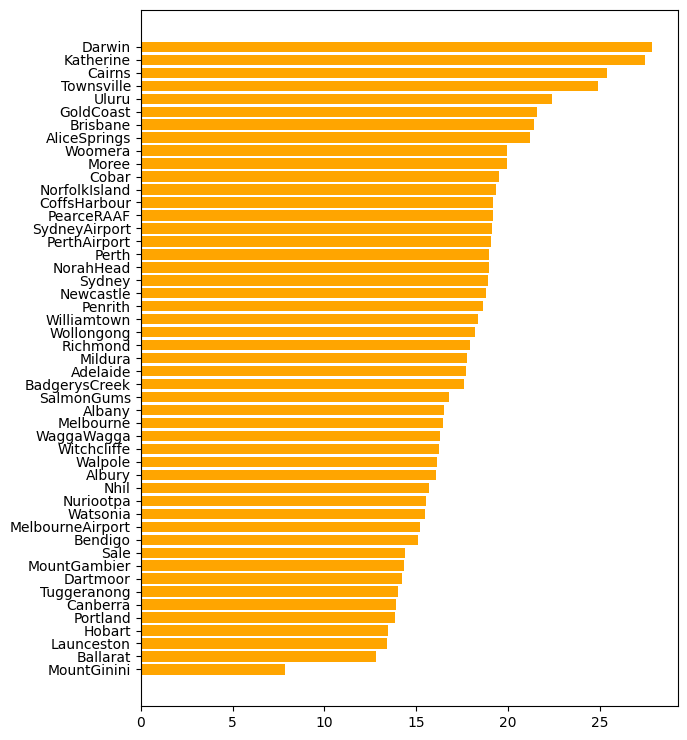

In [61]:

plt.rcParams["figure.figsize"] = [12.50, 7.50]
plt.rcParams["figure.autolayout"] = True

plt.subplot(122)
df_sorted = StationMeanTemp.sort_values('MeanTemp')
plt.barh('Station', 'MeanTemp', data=df_sorted, color='orange')

plt.show()

###3

In [62]:
data = df
StationGustSpeed = pd.DataFrame()

for i in Weatherstations:
  df2 = {'Station': i, 'MaxGust': np.max((data.loc[data['Location'] == i])['WindGustSpeed'])}
  StationGustSpeed = StationGustSpeed.append(df2, ignore_index = True)
StationGustSpeed

<ipython-input-62-4929dc6f6f9d>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  StationGustSpeed = StationGustSpeed.append(df2, ignore_index = True)
<ipython-input-62-4929dc6f6f9d>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  StationGustSpeed = StationGustSpeed.append(df2, ignore_index = True)
<ipython-input-62-4929dc6f6f9d>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  StationGustSpeed = StationGustSpeed.append(df2, ignore_index = True)
<ipython-input-62-4929dc6f6f9d>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  StationGustSpeed = StationGustSpeed.append(df2, ignore_index = True)
<ipython-input-62-4929dc6f6f9d>:6: FutureWar

,Station,MaxGust
0,Cobar,100.00000
1,Albury,107.00000
2,Moree,117.00000
3,CoffsHarbour,113.00000
4,BadgerysCreek,102.00000
5,Cairns,83.00000
6,Watsonia,96.00000
7,Sydney,96.00000
8,Canberra,106.00000
9,Melbourne,122.00000


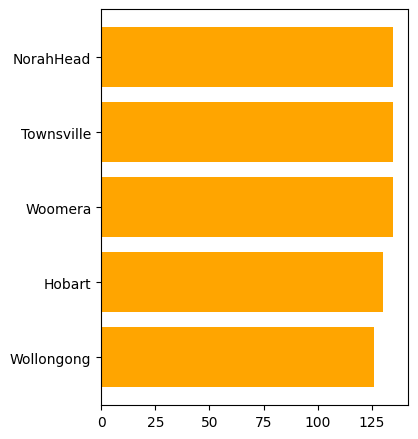

In [63]:

plt.rcParams["figure.figsize"] = [7.50, 4.50]
plt.rcParams["figure.autolayout"] = True

plt.subplot(122)
df_sorted = StationGustSpeed.sort_values('MaxGust').tail(5)
plt.barh('Station', 'MaxGust', data=df_sorted, color='orange')

plt.show()

###4

In [64]:
np.corrcoef(list(df['MeanTemp']),
       list(df['Sunshine']))

array([[1.        , 0.21206953],
       [0.21206953, 1.        ]])

###5

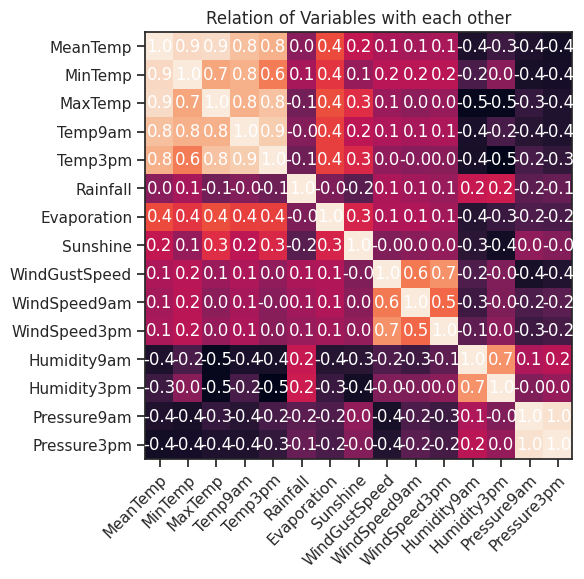

In [68]:
correla = np.corrcoef(
    [
        list(df['MeanTemp']),
        list(df['MinTemp']),
        list(df['MaxTemp']),
        list(df['Temp9am']),
        list(df['Temp3pm']),
        list(df['Rainfall']),
        list(df['Evaporation']),
        list(df['Sunshine']),
        list(df['WindGustSpeed']),
        list(df['WindSpeed9am']),
        list(df['WindSpeed3pm']),
        list(df['Humidity9am']),
        list(df['Humidity3pm']),
        list(df['Pressure9am']),
        list(df['Pressure3pm']),
    ]
)


import matplotlib as mpl

Rows = ['MeanTemp'  , 'MinTemp', 'MaxTemp', 'Temp9am', 'Temp3pm', 'Rainfall'  , 'Evaporation', 'Sunshine'  , 'WindGustSpeed',
 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm']

Cols = ['MeanTemp'  , 'MinTemp', 'MaxTemp', 'Temp9am', 'Temp3pm', 'Rainfall'  , 'Evaporation', 'Sunshine'  , 'WindGustSpeed',
 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm']

fig, ax = plt.subplots(figsize=(6, 6))
im = ax.imshow(correla)

# Show all ticks and label them with the respective list entries
ax.set_xticks(np.arange(len(Rows)), labels=Rows)
ax.set_yticks(np.arange(len(Cols)), labels=Cols)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(Cols)):
    for j in range(len(Rows)):
        text = ax.text(j, i, np.round(correla, decimals=1)[i, j],
                       ha="center", va="center", color="w")

ax.set_title("Relation of Variables with each other")
fig.tight_layout()
plt.show()

###6

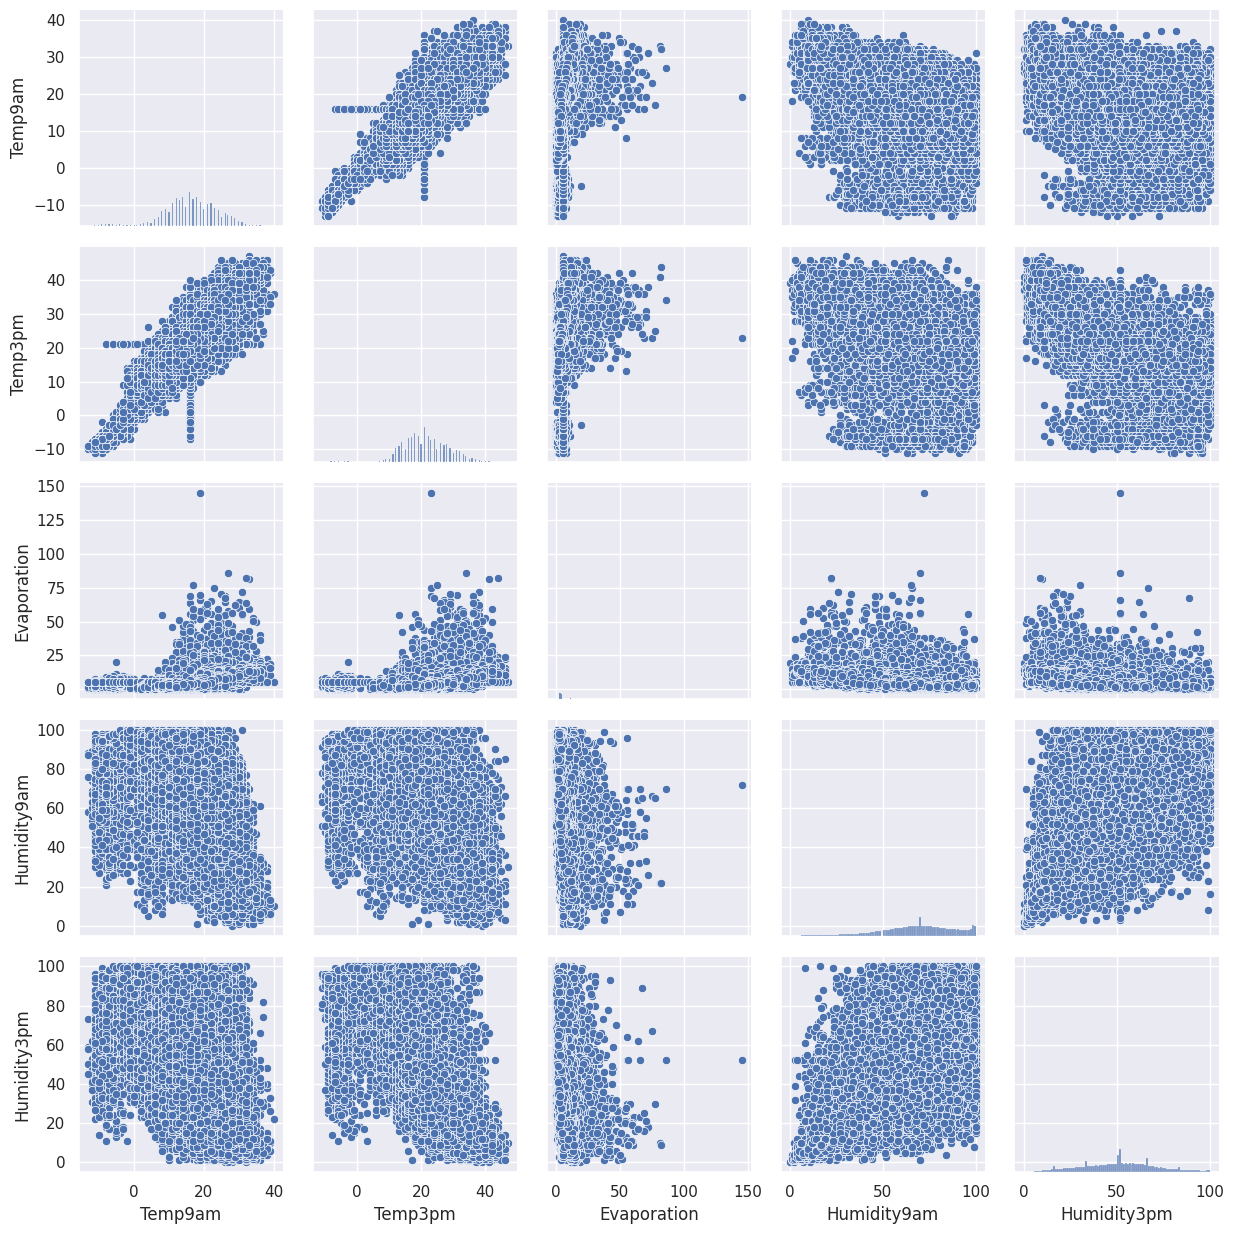

In [79]:

pairPlotData = df[['Temp9am', 'Temp3pm', 'Evaporation', 'Humidity9am', 'Humidity3pm']]
sns.pairplot(pairPlotData)

,MeanTemp,Evaporation,Humidity9am
0,26.5,12.0,20.0
1,23.5,14.8,30.0
2,25.0,12.6,70.0
3,28.5,10.8,42.0
4,30.0,11.4,37.0
...,...,...,...
145455,15.0,1.8,89.0
145456,15.0,3.6,90.0
145457,16.0,1.8,85.0
145458,15.0,3.8,62.0
